# Lab 3 Worksheet

## Binomial Problems:

􏱋An XYZ cell phone is made from 55 components. Each component has a .002 probability of being defective. What is the probability that an XYZ cell phone will not work perfectly?

### 1. Frame this problem in terms of the binomial experiment conditions.











### 2. Use R to solve the problem:

In [1]:
p <- 0.002 ## probability of success.
ans <- 1-pbinom(q=0, size=55, prob=p)
round(ans, 3) ## just rounds the answer to 3 decimal places.

[1] 0.104

On an assembly line of Acme Radio, the probability that a radio is defective is 1/15. If an inspector randomly checks 10 items, what is the probability that no more than 2 are defective?

In [2]:
p <- 1/15
n <- 10
## ---- finish the rest!

## Normal Distribution:



Let's go ahead and derive some intuition for the normal distribution. If you don't care, skip down to the problems!

I want to go from

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\}
$$

To something that makes sense to everyone.

Let's first define distance. Distance metrics are measure of the distance between two points, so we want the following qualities for a distance function:

1. $d(x,y) \geq 0$ for all $x,y$. 
2. $d(x,x) =0$ 

All distances are positive, so you can't have negative distance and the distance between something and itself is 0.

Some functions that work well with this include:

$$
d(x,y) = \sqrt{(x-y)^2}
$$

But, let's say that we want to include the variance of the data into this equation.
This makes sense because if $\sigma^2$ is large, that confers different information about the distance (or spread) of the data. for a concrete example, let's take the function that has been included for hw3:

In [3]:
## ---- Don't change this function, or you risk it not working correctly!
norm_samp_dist_plot <- function(n, mean=0, sd=1, num_samples=100000){
    ## ---- load neccesary packages (but check first and make it easy to install 
    ## if not already there). 
    list_of_packages <- c("ggplot2", "reshape2")
    new_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
    if(length(new.packages)>1) {
        install.packages(new_packages, repos="http://cran.rstudio.com/")
    }
    library(ggplot2)
    ## ---- simulate
    samps <- rnorm(num_samples, mean, sd)
    sd_samps <- rnorm(num_samples, mean, sd/sqrt(n))
    ## ---- collect
    dat <- data.frame(samps, sd_samps)
    colnames(dat) <- c("original", "sampling_dist")
    dat_m <- reshape2::melt(dat)
    colnames(dat_m)<-c("dist", "value")
    print(ggplot(dat_m, aes(value))+geom_density(aes(color=dist)) + theme_bw())
}


No id variables; using all as measure variables


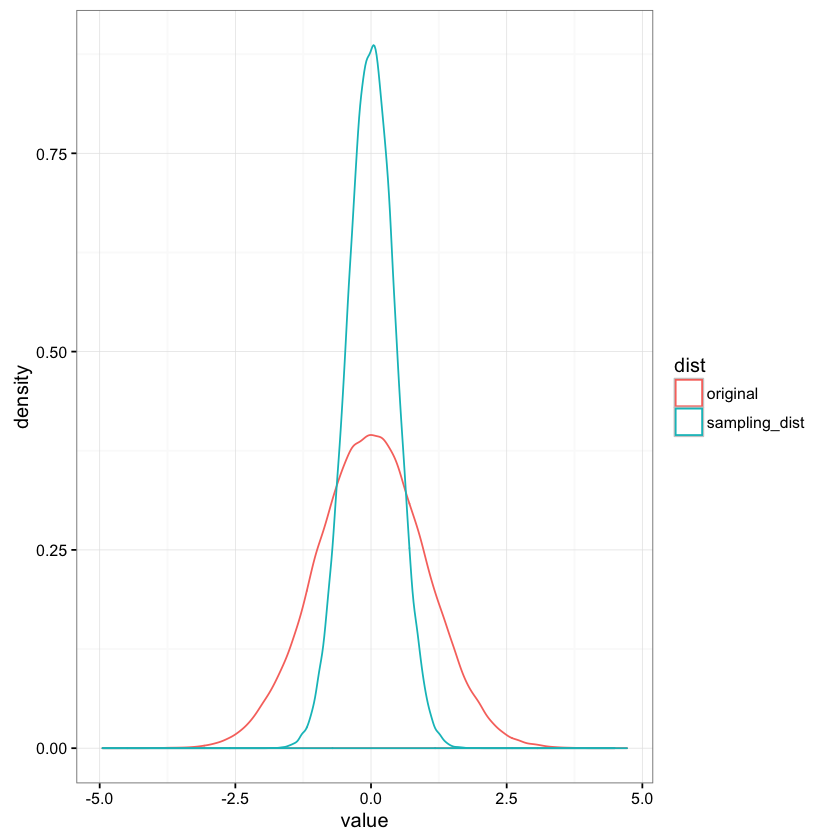

In [5]:
norm_samp_dist_plot(n=5)

We see that the variance for the sampling distribution of the sample mean has a much smaller variance that that of the original distribution. So take any two points the x axis of this plot, and measure the distance between them. I'm sure for the same two points, the distance between the two points would be the same for both, but is this a really fair comparison? It seems like points on the blue curve might be farther apart on the blue curve than on the orange. This is really determined by the variance. So, why don't we divide our distance measure by the variance. Thus we get a variance-adjusted distance measure. 
i.e. 

$$
d_{kyle}(x,y) = \sqrt{\frac{(x-y)^2}{\sigma^2}}
$$

Called $d_{kyle}$ because I came up with it. j.k.

Now we have a much fairer distance measure between $(x,y)$. Let's say we want to know the distance between the mean $\mu$ and any value that a random variable with variance $\sigma^2$, then this is:

$$
d(x,\mu) = \sqrt{\frac{(x-\mu)^2}{\sigma^2}}
$$

And then we can create a probability distribution that measures that is largest at the mean, and assigns less and less probability to values farther from the mean. So we want a probability distribution that is a function of the distance from the mean. i.e:

$$
P(X=x) = f(d(x, \mu))
$$

such that all of the requirements of a probability distribution hold, namely.

$$
0 \leq P(X=x) \leq 1 
$$

If $A$ is the universe then
$$
P(X\in A) = 1
$$


Then a good candidate for this function is the exponential function, namely

$$
f(x) = c \times exp \{ -1/2x^2 \} = c \times e^{-1/2 x^2}
$$

The $c$ is some constant and $c e^0 = c\times 1$, and $e^{-1/2 x^2}$ gets smaller as $x$ gets larger. Thus, if we 
plug the distance function in we get:

$$
P(X=x) = c \times exp \{-1/2 (d(x,\mu))^2 \}
$$

The $c=\frac{1}{\sqrt{2\pi\sigma^2}}$ and is found by 

## Calculus Alert, this section requires understanding of integration.
$$
\int_{-\infty}^{\infty} P(X=x)dx = \int_{-\infty}^{\infty}  c \times exp \{-1/2 (d(x,\mu))^2 \} dx = c \int_{-\infty}^{\infty} exp \{-1/2 (d(x,\mu))^2 \} dx = c\times \sqrt{2\pi\sigma^2} = 1
$$

## The average full-time faculty member in higher education works on average 53 hours per week with a standard deviation of 2.8 hours. If the data is normally distributed what percentage of faculty members work:

###  a. More than 60 hours per week?
􏰹

### b. Between 40 and 48 hours per week?

## For any $X\sim N(\mu, \sigma^2)$, and any $Z\sim N(0,1)$, write the equation that:

### a. Represents $X$ as a linear function of $Z$. 

### b. Represents $Z$ as a linear function of $X$. 

## Central Limit Theorem


### The central limit theorem is a very beautiful result from probability theory. It is important in that it is invariant to the distribution of the data.

In [9]:
x <- rpois(10000, lambda=1)

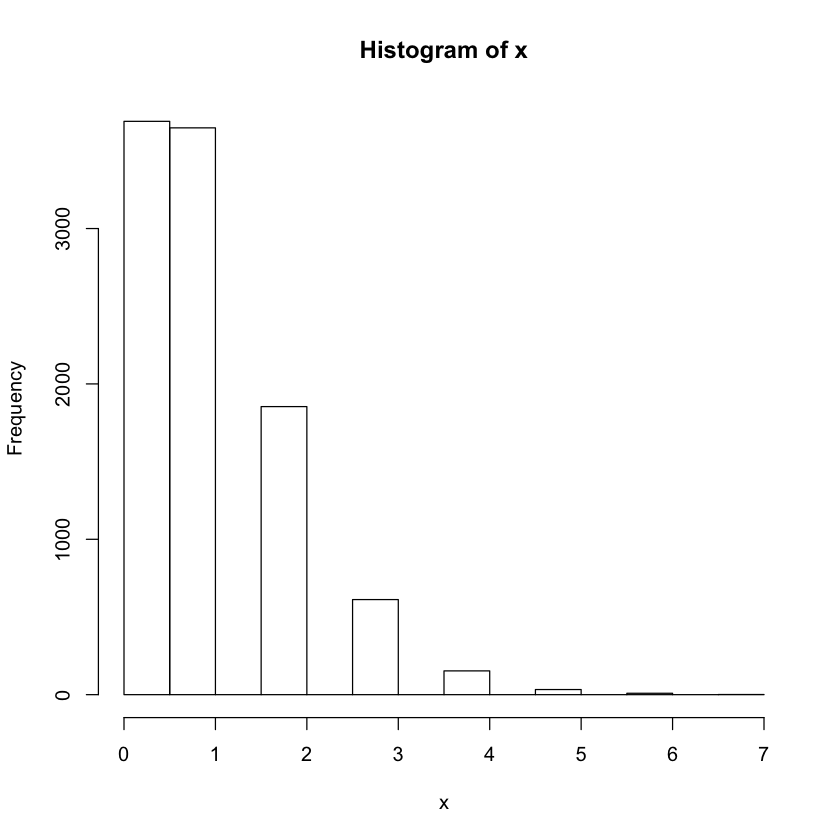

In [10]:
hist(x)

### Obviously, not normal. But, lets look at the sample mean $\bar{X} = \frac{1}{n}\sum_{i}X_{i}$

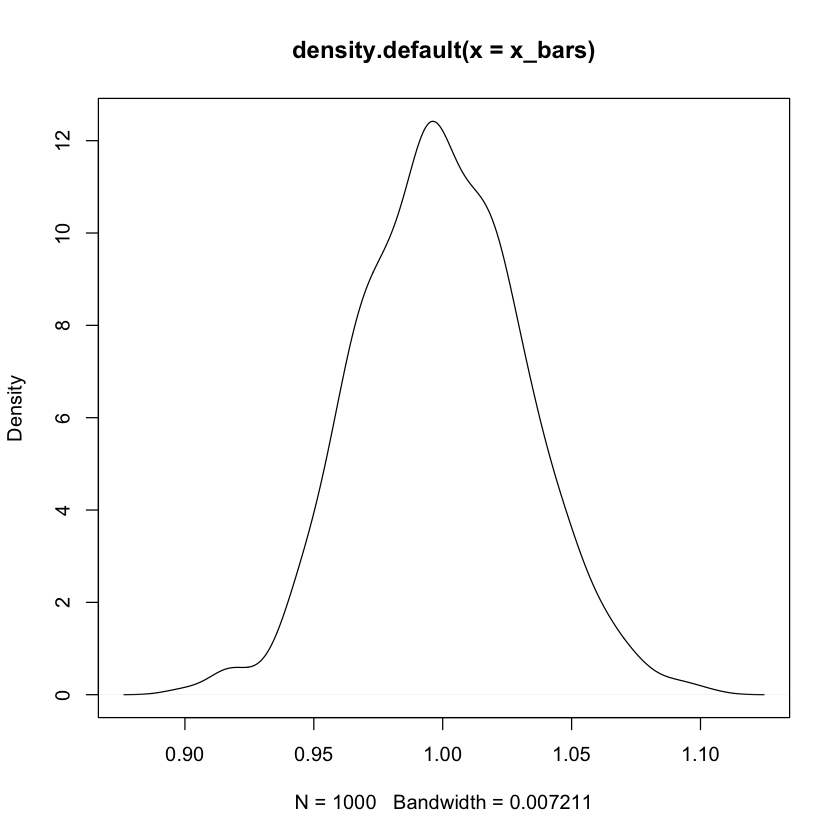

In [11]:
x_bars <- numeric(1000)

for(k in 1:length(x_bars)){
    x <- rpois(1000, lambda=1)
    x_bars[k] <- mean(x)
}

plot(density(x_bars))

Looking pretty normal, right?